<a href="https://colab.research.google.com/github/VARSHAJOSHY/multi-lingual-stance-dataset/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Name:** VARSHA JOSHY

**Student Number:** 2699662J

# **TextAs Data Coursework**

## **Downloading and loading Data**

**This code loads the prepared split of the Reddit data into training, validation and testing set.**

In [ ]:
!wget -O reddit_data_split.zip https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
!unzip -o reddit_data_split.zip

--2022-07-14 16:27:38--  https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
Resolving gla-my.sharepoint.com (gla-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to gla-my.sharepoint.com (gla-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip?ga=1 [following]
--2022-07-14 16:27:39--  https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip?ga=1
Reusing existing connection to gla-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 468327 (457K) [application/x-zip-compressed]
Saving to: ‘reddit_data_split.zip’

reddit_data_split.z 100%[===================>] 457.35K   694KB/s    in 0.7s    

2022-07-14 16:27:40 (694 KB/s) - ‘reddit_data_split.zip’ saved [468327/468327]

Archive:  reddit_data_spli

In [ ]:
import json

with open('reddit_train.json') as f:
    train_data = json.load(f)
with open('reddit_val.json') as f:
    validation_data = json.load(f)
with open('reddit_test.json') as f:
    test_data = json.load(f)

print("Number of posts in training data:", len(train_data))
print("Number of posts in validation data:", len(validation_data))
print("Number of posts in test data:", len(test_data))

Number of posts in training data: 1200
Number of posts in validation data: 400
Number of posts in test data: 400


**This code block download libraries/functions from various modules that are required to execute the collab/notebook**

In [ ]:
import spacy
import pandas as pd
import collections

# Load the medium english model.
# We will use this model to get embedding features for tokens later.
#!python -m spacy download en_core_web_md

nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

# Download a stopword list
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pprint import pprint
from time import time
import logging
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
#Python, pandas
#Function on CSS created for this
from IPython.display import display_html

#custom tokenization
import re
from textblob import TextBlob
from textblob import Word
from bs4 import BeautifulSoup

#gensim word2vec libraries
import gensim.downloader as gensim_api
import gensim
from gensim.models import Word2Vec, KeyedVectors

from sklearn.pipeline import Pipeline
from gensim.sklearn_api import W2VTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Q1: Comparing Classifiers**

#### **Q1a: Exploring Dataset**
Calculate the counts for the various labels and comment on the distribution of labels in the training/validation/test sets



*   **Training Dataset**
is used to train the model or fit the parameters to the model.



In [ ]:
collabels = ['subreddit', 'title', 'score', 'id', 'author','body']
train_data_list = list()
for pos, item in enumerate(train_data):
    train_data_list.append( (train_data[pos]['subreddit'], train_data[pos]['title'], train_data[pos]['score'], train_data[pos]['id'], train_data[pos]['author'], train_data[pos]['body']))
print("We have %d Reddit posts in training dataset"  % len(train_data_list))
train_data_df = pd.DataFrame(train_data_list, columns=collabels)
train_data_df

We have 1200 Reddit posts in training dataset


,subreddit,title,score,id,author,body
0,PS4,Can I get banned for having a game that I didn...,0,queqfu,XC-XERZ,"Long story short, I saw ESO in my library, dow..."
1,pcgaming,How to get a Kinect sensor to work with a PC?,0,1eujoa,ZachTheKing,I have seen a video online where someone took ...
2,NintendoSwitch,Switch Only Charges with GoPro Cable,5,m00bx7,BluePenguin2002,"Hi, hope this is the right place/way to post t..."
3,antiMLM,L’Occitane going down MLM route?,15,q13pvx,100fluffyclouds,After buying a majority share in Limelight/Alc...
4,HydroHomies,Guys i need your help,2,rxiv2g,Epicskeleton53,Is it ok for me to drink coffee in the morning...
...,...,...,...,...,...,...
1195,xbox,I’m debating if I should get a PC or Xbox Seri...,2,m6a172,Matt3339,I do have some question as well.\n1. Can the S...
1196,Coffee,Where can I buy several exotic or unique coffees?,10,3yvspn,victorlinguist,I am looking for an online place that will off...
1197,tea,What are some of y'all's favorite non-caffeina...,5,bdlfo5,Bobthebanana73,"Due to medical reasons, I am currently not all..."
1198,Coffee,[Q] What pour over method should I try?,7,htwdo3,NorwegianWarlord,Hey all!\nThe recent years I've learned to lov...



*   **Validation Dataset**
is used to provide an unbiased evaluation of a model fitted on the training dataset as well as tuning hyperparameters

In [ ]:
val_data_list = list()
for pos, item in enumerate(validation_data):
    val_data_list.append( (validation_data[pos]['subreddit'], validation_data[pos]['title'], validation_data[pos]['score'], validation_data[pos]['id'], validation_data[pos]['author'], validation_data[pos]['body']))
print("We have %d Reddit posts in validation dataset"  % len(val_data_list))
val_data_df = pd.DataFrame(val_data_list, columns=collabels)
val_data_df

We have 400 Reddit posts in validation dataset


,subreddit,title,score,id,author,body
0,Coffee,Reusable Nespresso Pods,3,j4d0i9,SaltyRob78,Hey there\nI want to go the reusable pod route...
1,HydroHomies,"Hydro News (sad) A city in US Michigan, Benton...",8,q6lb22,Kirinsdragon,I am not from the US and such news never reach...
2,Soda,Can’t find Sprite Zero Sugar Winter Spiced Cra...,2,rs0qmb,AnonymousPete23,Sprite released this limited edition soda for ...
3,tea,"I have a lot of teas, loose and in bags, that ...",11,egwnfh,T_as_in_Pterodactyl,"Long story short, I just have too many teas in..."
4,Coffee,Should I rinse bamboo filters before pour over?,0,pkxx4y,jack_hof,Having a hard time finding an answer to this w...
...,...,...,...,...,...,...
395,Soda,Where and How can i preserve collectable sodas...,0,lvjhhw,Pokeboy99,I've had some sodas that i wanted to keep leak...
396,Soda,What American Soda should I get?,2,kuo4ky,Old_Advantage_2341,So I recently started selling an American Trea...
397,xbox,refund bought with a gift card,3,rtvh45,SwingStuff,just wondering if i bought something with a gi...
398,PS4,GTA V install crash,0,legirx,firewolf37,so i decided to reinstall gta v after the cayo...


*   **Test Dataset**
is used to provide an unbiased evaluation of a final model fitted on the training dataset

In [ ]:
test_data_list = list()
for pos, item in enumerate(test_data):
    test_data_list.append( (test_data[pos]['subreddit'], test_data[pos]['title'], test_data[pos]['score'], test_data[pos]['id'], test_data[pos]['author'], test_data[pos]['body']))
print("We have %d Reddit posts in test dataset"  % len(test_data_list))
test_data_df = pd.DataFrame(test_data_list, columns=collabels)
test_data_df

We have 400 Reddit posts in test dataset


,subreddit,title,score,id,author,body
0,Coffee,Best Indie Coffee Brands that have K-Cups?,0,3s7usq,GrandRapidsCreative,I know most aren't the biggest fan of K-Cups a...
1,NintendoSwitch,How do you decide when to keep playing or when...,125,r8luun,windlep7,I know the obvious answer is to give up if you...
2,xbox,"So I’m relatively new on Xbox, and have a ques...",1,qwzis0,GoblinGuide93,I was playing infinite with friends in the par...
3,tea,Best gyokuro vendors in the US?,5,m1m3as,SocioDexter70,Ive only ever tried Ippodo since they have a U...
4,antiMLM,"My Mary Kay hun neighbor has a ""no soliciting""...",1038,pg5gs0,OkWallaby0009,I guess she doesn't like to be bothered by peo...
...,...,...,...,...,...,...
395,pcgaming,I'm blown away by how much better Linux suppor...,152,fv1cgw,UnDispelled,This is just a post I wanted to make praising ...
396,NintendoSwitch,TIL I can use USB-C Headphones on my Switch,213,anqw0e,LufiXx,While on the train this morning i put in my Hu...
397,NintendoSwitch,Shin Megami Tensei V is the Dark Souls of Poke...,0,r1ev6l,ramen_junk,This is the first SMT game I ever played and I...
398,pcgaming,"Gaming 20 years in the future, what are your o...",35,pj00n4,Pretend-Tangelo56,I urge you to be creative with your opinions.\...




*  **Label distribution in Training/Validation/Test dataset**



**display_side_by_side** function used for displaying two dataframes side my side.

In [ ]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

Training data contains 9 unique labels/subreddit
Validation data contains 9 unique labels/subreddit
Test data contains 9 unique labels/subreddit

     Distribution of labels in Training set      Distribution of labels in Validation set          Distribution of labels in Test set


,subreddit,count,prior_probabilities
0,PS4,142,0.118
1,pcgaming,135,0.112
2,NintendoSwitch,145,0.121
3,antiMLM,128,0.107
4,HydroHomies,134,0.112
5,Coffee,136,0.113
6,xbox,132,0.110
7,Soda,102,0.085
8,tea,146,0.122
,subreddit,count,prior_probabilities


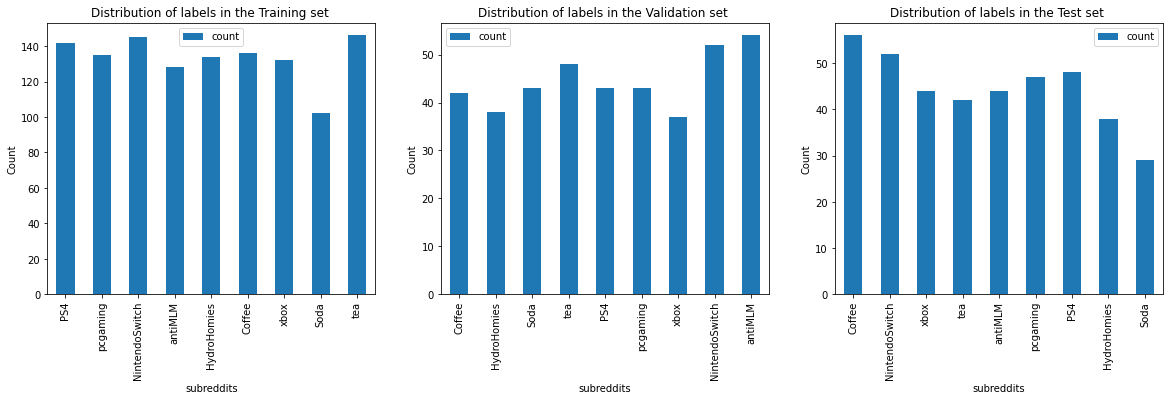

In [ ]:
figure, axes = plt.subplots(1, 3,figsize=(20,5))

#training data
uniquelabels_tr = train_data_df['subreddit'].unique()
print("Training data contains %d unique labels/subreddit" % len(uniquelabels_tr))

tr_label_counts = collections.Counter(train_data_df['subreddit'])
tr_list=[]
for label in tr_label_counts:
  tr_list.append([label,tr_label_counts[label],np.round(tr_label_counts[label] / len(train_data_df),3)])
tr_label = pd.DataFrame(tr_list,columns=['subreddit','count','prior_probabilities'])
tr_label.plot.bar(x='subreddit', y='count', ax=axes[0])
axes[0].title.set_text("Distribution of labels in the Training set ")

#validation data
uniquelabels_val = val_data_df['subreddit'].unique()
print("Validation data contains %d unique labels/subreddit" % len(uniquelabels_val))

val_label_counts = collections.Counter(val_data_df['subreddit'])
val_list=[]
for label in val_label_counts:
  val_list.append([label,val_label_counts[label],np.round(val_label_counts[label] / len(val_data_df),3)])
val_label = pd.DataFrame(val_list,columns=['subreddit','count','prior_probabilities'])
val_label.plot.bar(x='subreddit', y='count', ax=axes[1])
axes[1].title.set_text("Distribution of labels in the Validation set ")

#test data
uniquelabels_test = test_data_df['subreddit'].unique()
print("Test data contains %d unique labels/subreddit" % len(uniquelabels_test))

test_label_counts = collections.Counter(test_data_df['subreddit'])
test_list=[]
for label in test_label_counts:
  test_list.append([label,test_label_counts[label],np.round(test_label_counts[label] / len(test_data_df),3)])
test_label = pd.DataFrame(test_list,columns=['subreddit','count','prior_probabilities'])
test_label.style.set_caption("Training Set")
test_label.plot.bar(x='subreddit', y='count',ax=axes[2])
axes[2].title.set_text("Distribution of labels in the Test set ")

print()
print("     Distribution of labels in Training set      Distribution of labels in Validation set          Distribution of labels in Test set")
display_side_by_side(tr_label,val_label,test_label)

print()
for ax in axes.flat:
    ax.set(xlabel='subreddits', ylabel='Count')



*   Analysing some statistics of datasets to check whether albels are evenly distributed among train, validation and test set. All of these labels appear in the three  datasets, however they are not uniformly distributed, and I suspcet that data is biased.
*   For example, 8% training set data has label ‘soda’, while validation set has 11% soda label, and test set has a 7% soda label. Similarly, training set has 11% antiMLM as a label, while validation set has 14% antiMLM as a label, and test set has 11% antiMLM as a label.




In [ ]:
number_soda_train = sum(train_data_df['subreddit'] == 'Soda')
number_soda_val = sum(val_data_df['subreddit'] == 'Soda')
number_soda_test = sum(test_data_df['subreddit'] == 'Soda')

print('Training set contains %0.0f%% soda as label' % (100*number_soda_train/len(train_data_df)))
print('Validation set contains %0.0f%% soda as label' % (100*number_soda_val/len(val_data_df)))
print('Test set contains %0.0f%% soda as label' % (100*number_soda_test/len(test_data_df)))

print()

number_antiMLM_train = sum(train_data_df['subreddit'] == 'antiMLM')
number_antiMLM_val = sum(val_data_df['subreddit'] == 'antiMLM')
number_antiMLM_test = sum(test_data_df['subreddit'] == 'antiMLM')

print('Training set contains %0.0f%% antiMLM as label' % (100*number_antiMLM_train/len(train_data_df)))
print('Validation set contains %0.0f%% antiMLM as label' % (100*number_antiMLM_val/len(val_data_df)))
print('Test set contains %0.0f%% antiMLM as label' % (100*number_antiMLM_test/len(test_data_df)))

Training set contains 8% soda as label
Validation set contains 11% soda as label
Test set contains 7% soda as label

Training set contains 11% antiMLM as label
Validation set contains 14% antiMLM as label
Test set contains 11% antiMLM as label


### **Q1b:Implementing Classifiers**
Implement five classifiers, train them on the training set and evaluate on the test set.

**text_pipeline_spacy() function tokenize and normalize the text (column name - 'body') from reddit posts.**
:Function split the text into group of words(also called tokens), eliminate stopwords, punctuations and space, and after lemmatization it return lower case tokens

In [ ]:
def text_pipeline_spacy(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    return tokens
#text_pipeline_spacy("hHi How are you? What you doing?")

In [ ]:
text ="Iplacedanorder(order#ZA10880)on05-11-2020forrearaxlebreakdiscsforaBMW8Coupepartno.B342r.DH-Dhavelosttheorder.Pleasere-deliverASAP."
doc = nlp(text)
for t in doc:
  print(t)

Iplacedanorder(order#ZA10880)on05
-
11
-
2020forrearaxlebreakdiscsforaBMW8Coupepartno
.
B342r
.
DH
-
Dhavelosttheorder
.
Pleasere
-
deliverASAP
.


In [ ]:
from nltk.tokenize import regexp_tokenize
pattern1 = r'(\\w+|\\?|!)'
pattern2 = r"(\w+|#\d|\?|!)"
pattern3 = r'(#\\d\\w+\\?!)'
pattern4 = r'\\s+'
pprint(regexp_tokenize(text, pattern2))

['Iplacedanorder',
 'order',
 'ZA10880',
 'on05',
 '11',
 '2020forrearaxlebreakdiscsforaBMW8Coupepartno',
 'B342r',
 'DH',
 'Dhavelosttheorder',
 'Pleasere',
 'deliverASAP']


In [ ]:
text ="Iplacedanorder(order#ZA10880)on05-11-2020forrearaxlebreakdiscsforaBMW8Coupepartno.B342r.DH-Dhavelosttheorder.Pleasere-deliverASAP."
doc = nlp(text)
for t in doc:
  print(t)

Iplacedanorder(order#ZA10880)on05
-
11
-
2020forrearaxlebreakdiscsforaBMW8Coupepartno
.
B342r
.
DH
-
Dhavelosttheorder
.
Pleasere
-
deliverASAP
.


In [ ]:
text ="I placed an order (order# ZA10880) on 05-11-2020 for rear axle break discs for a BMW8Coupe - part no. B342r. DH-D have lost the order. Please re-deliver ASAP."
doc = nlp(text)
for t in doc:
  print(t)

I
placed
an
order
(
order
#
ZA10880
)
on
05
-
11
-
2020
for
rear
axle
break
discs
for
a
BMW8Coupe
-
part
no
.
B342r
.
DH
-
D
have
lost
the
order
.
Please
re
-
deliver
ASAP
.


**ItemSelector() function is a custome made transformer used for column selection** Result of this transformer is a dataframe

In [ ]:
text ="[He didn’t like the U.S. movie “Snakes on a train, revenge of Viper-man!”, now playing in the U.K.]"
doc = nlp(text)
for t in doc:
  print(t)

[
He
did
n’t
like
the
U.S.
movie
“
Snakes
on
a
train
,
revenge
of
Viper
-
man
!
”
,
now
playing
in
the
U.K.
]


In [ ]:
!pip install pytorch_pretrained_bert pytorch-nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
# Data processing
data = ... # Loads a vector of raw text documents
train_index = int(len(train_data_df) * 0.1)
print(train_index)
train_data = data[:train_index,:]
validation_data = data[int(train_index*0.2):,:]
test_data = data[train_index:,:]
# Assume corresponding labels for each data subset
train_labels, test_labels, validation_labels = ...
# Vectorization
one_hot_vectorizer = CountVectorizer(tokenizer=tokenize_normalize,
binary=True, max_features=20)
one_hot_vectorizer.fit(train_data)
train_features = one_hot_vectorizer.transform(train_features)
validation_features = one_hot_vectorizer.fit_transform(validation_data)
test_features = one_hot_vectorizer.transform(test_data)
# Classification
lr = LogisticRegression(solver='saga', max_iter=500)
lr_model = lr.fit(train_features, train_labels)
evaluation_summary("LR Train summary",
lr_model.predict(train_features), validation_labels)
lr_model = lr.fit(validation_features, validation_features)
evaluation_summary("LR Validation summary",
lr_model.predict(validation_features), validation_labels)
lr_model = lr.fit(test_features, test_labels)
evaluation_summary("LR Test summary",
lr_model.predict(validation_features), test_labels)

120


TypeError: ignored

In [ ]:
import sys
import numpy as np
import random as rn
import torch
from pytorch_pretrained_bert import BertModel
from torch import nn
from torchnlp.datasets import imdb_dataset
from pytorch_pretrained_bert import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


In [ ]:
tokenizer.tokenize("[He didn’t like the U.S. movie “Snakes on a train, revenge of Viper-man!”, now playing in the U.K.]")

In [ ]:
tokenizer.tokenize("I placed an order (order# ZA10880) on 05-11-2020 for rear axle break discs for a BMW8Coupe - part no. B342r. DH-D have lost the order. Please re-deliver ASAP.")

In [ ]:
class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]



**evaluation_summary() function prints out an evaluation summary with  performance metrics icluding accuracy, precision, recall and	F1 Score as well as a 'classification report'**



In [ ]:
def evaluation_summary(description, true_labels, predictions, target_classes):
  print("Evaluation for: " + description)
  print(classification_report(true_labels, predictions,  digits=3, zero_division=0, target_names=target_classes))
  #print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions))

Vectorization is a technique for converting text documents into numerical vectors. **Count Vectorizer** is one of the simplest ways to vectorize text. Fit the vectorizer model (with default settings) on the training data column ‘body’ to learn the word vocabulary and transform the text in column ‘body’ to a document term matrix in which the individual cells reflect term frequency within the document (each reddit post body), and the columns reflects each word in the corpus (entire train_data[‘body’]).In built tokenizer in CountVectorizer divides sentences into a collection of tokens in the lexicon. Punctuation and special characters are also removed.

In [ ]:
# Create a one-hot encoding vectorizer. Pass in the tokenizer as the tokenizer to the vectorizer.
onehot_vectorizer = CountVectorizer()
tr_vector_onehot = onehot_vectorizer.fit_transform(train_data_df['body'].tolist())
val__vector_onehot = onehot_vectorizer.transform(val_data_df['body'])
test_vector_onehot = onehot_vectorizer.transform(test_data_df['body'])

**TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer**: It tells the model about the significance of a word in a dataset. It relies on two concepts-term frequency (TF) and inverse document frequency (IDF). The frequency with which a word appears in the document/corpus is indicated by TF.TF indicates how frequently a word is appeared in the document/corpus. The IDF is used to determine the significance of a word in a document. Words that occur less frequently are more informative. This vectorizer was used with the default settings and its built-in tokenizer.

In [ ]:
#create TF-IDF vectorization. Pass in the tokenizer as the tokenizer to the vectorizer.
tfidf_vectorizer = TfidfVectorizer()
tr_vector_tfidf = tfidf_vectorizer.fit_transform(train_data_df['body'].tolist())
val_vector_tfidf = tfidf_vectorizer.transform(val_data_df['body'])
test_vector_tfidf = tfidf_vectorizer.transform(test_data_df['body'])

**Extracting the labels for each of the datasets**

In [ ]:
train_labels = train_data_df['subreddit']
val_labels = val_data_df['subreddit']
test_labels = test_data_df['subreddit']



1.   **Dummy Classifier with strategy="most_frequent"**


*   This classifier is used as a baseline for other classifiers that means on the given dataset other classifiers are expected to perform better. It classifies the data using simple rules and predicts most frequent class label in the training dataset by ignoring the input feature values passed as the X argument to fit and predict




*   Training set - Trained dummy classifier on the training set



In [ ]:
#Dummy Classifier with strategy="most_frequent"
dummy_frq = DummyClassifier(strategy="most_frequent", random_state=1)
dummy_frq.fit(tr_vector_onehot, train_labels)
dummy_frq_predicted_tr = dummy_frq.predict(tr_vector_onehot)
evaluation_summary("Dummy Classifier['most_frequent']: Training set", train_labels, dummy_frq_predicted_tr,  uniquelabels_tr)
ConfusionMatrixDisplay.from_predictions(train_labels,dummy_frq_predicted_tr,xticks_rotation='vertical')

In [ ]:
train_labels

*   Test set - predict the model on testset

In [ ]:
#Dummy Classifier with strategy="most_frequent" - test set
dummy_frq_predicted_test = dummy_frq.predict(test_vector_onehot)
evaluation_summary("Dummy Classifier['most_frequent: Test set']", test_labels, dummy_frq_predicted_test,  uniquelabels_test)
ConfusionMatrixDisplay.from_predictions(test_labels,dummy_frq_predicted_test,xticks_rotation='vertical')

**Observation** : Trained dummy classifier on the training set and achieved a 12.2% accuracy with F1 score of 0.024(macro) and 0.026(weighted). Got 146 true positive values that correspond to reddit posts with label/subreddits of 'tea' and our model correctly identified them because we trained a dummy classifier with the "most frequent" parameter, which predicts the most common class label in the training dataset (ie., posts with subreddit 'tea'). Predict it on the test set after training, which resulted 10.5% of accuracy with F1 score of 0.021(macro) and 0.020(weighted). Model correctly identified 42 true positive values that correspond to reddit posts with label/subreddits of 'tea'.

2.   **Dummy Classifier with strategy="stratified"**
 : This is another type of dummy classifier which predicts on the basis of the label distribution of the training dataset. For example, if the reddit post with label ‘soda occurs about 8.5% of the time in the training set, then the dummy classifier will output ‘soda’ class with 8.5% probability.

*   Training Set : Trained dummy classifier with stratified parameter on the training set



In [ ]:
#Dummy Classifier with strategy="stratified"
dummy_str = DummyClassifier(strategy="stratified", random_state=1)
dummy_str.fit(tr_vector_onehot, train_labels)
dummy_str_predicted_tr = dummy_str.predict(tr_vector_onehot)
evaluation_summary("Dummy Classifier['stratified']: Training set", train_labels, dummy_str_predicted_tr,  uniquelabels_tr)
ConfusionMatrixDisplay.from_predictions(train_labels,dummy_str_predicted_tr,xticks_rotation='vertical')

*   Test Set : predict the model on test set



In [ ]:
#Dummy Classifier with strategy="stratified" - test set
dummy_str_predicted_test = dummy_str.predict(test_vector_onehot)
evaluation_summary("Dummy Classifier['stratified']: Test set", test_labels, dummy_str_predicted_test,  uniquelabels_test)
ConfusionMatrixDisplay.from_predictions(test_labels,dummy_str_predicted_test,xticks_rotation='vertical')



3.   **LogisticRegression with One-hot vectorization**
: used to predict a dependent categorical target variable using sigmoid function.



*   Training Set


In [ ]:
#LogisticRegression with One-hot vectorization
lr_clf = LogisticRegression(random_state=1)
lr_model = lr_clf.fit(tr_vector_onehot, train_labels)
lr_onehot_predicted_tr = lr_model.predict(tr_vector_onehot)
evaluation_summary("LR onehot vectorization: Training set", train_labels, lr_onehot_predicted_tr,  uniquelabels_tr)
ConfusionMatrixDisplay.from_predictions(train_labels, lr_onehot_predicted_tr,xticks_rotation='vertical')



*   Test Set



In [ ]:
#LogisticRegression with One-hot vectorization - test set
lr_onehot_predicted_test = lr_model.predict(test_vector_onehot)
evaluation_summary("LR onehot vectorization: Test set", test_labels, lr_onehot_predicted_test,  uniquelabels_test)
ConfusionMatrixDisplay.from_predictions(test_labels,lr_onehot_predicted_test,xticks_rotation='vertical')



4.   **LogisticRegression with TF-IDF vectorization (default settings)**






*   Training Set



In [ ]:
#LogisticRegression with TF-IDF vectorization (default settings)
lr_tfidf_clf = LogisticRegression(random_state=1)
lr_tfidf_model = lr_tfidf_clf.fit(tr_vector_tfidf, train_labels)
lr_tfidf_predicted_tr = lr_tfidf_model.predict(tr_vector_tfidf)
evaluation_summary("LogisticRegression TF-IDF Vectorization: Training set", train_labels, lr_tfidf_predicted_tr,  uniquelabels_tr)
ConfusionMatrixDisplay.from_predictions(train_labels,lr_tfidf_predicted_tr,xticks_rotation='vertical')



*   Test Set



In [ ]:
#LogisticRegression with TF-IDF vectorization (default settings) - test set
lr_tfidf_predicted_test = lr_tfidf_model.predict(test_vector_tfidf)
evaluation_summary("LogisticRegression TF-IDF Vectorization: Test set", test_labels, lr_tfidf_predicted_test,  uniquelabels_test)
ConfusionMatrixDisplay.from_predictions(test_labels,lr_tfidf_predicted_test,xticks_rotation='vertical')



6.   **SVC Classifier with One-hot vectorization (SVM with RBF kernel, default settings))**

Support Vectors Classifier maximize the distance between sample points and the hyperplane and find the best hyperplane to separate the different classes




*   Training Set



In [ ]:
#SVC Classifier with One-hot vectorization (SVM with RBF kernel, default settings)) - train set
svc_clf = svm.SVC(kernel='rbf')
svc_model = svc_clf.fit(tr_vector_onehot, train_labels)
svc_predicted_tr = svc_model.predict(tr_vector_onehot)
evaluation_summary("SVC Classifier with One-hot vectorization: Training set ", train_labels, svc_predicted_tr,  uniquelabels_tr)
ConfusionMatrixDisplay.from_predictions(train_labels,svc_predicted_tr,xticks_rotation='vertical')



*   Test Set



In [ ]:
#SVC Classifier with One-hot vectorization (SVM with RBF kernel, default settings)) - test set
svc_predicted_test = svc_model.predict(test_vector_onehot)
evaluation_summary("SVC Classifier with One-hot vectorization: Test set ", test_labels, svc_predicted_test,  uniquelabels_test)
ConfusionMatrixDisplay.from_predictions(test_labels,svc_predicted_test,xticks_rotation='vertical')



*   **Comparison** : Discuss the classifier performance in comparison to the others and preprocessing techniques



In [ ]:
predicted_label_trainset = [dummy_frq_predicted_tr,dummy_str_predicted_tr,lr_onehot_predicted_tr,lr_tfidf_predicted_tr,svc_predicted_tr]
predicted_label_testset = [dummy_frq_predicted_test,dummy_str_predicted_test,lr_onehot_predicted_test,lr_tfidf_predicted_test,svc_predicted_test]
classifier_set =['Dummy Classifier with strategy="most_frequent"','Dummy Classifier with strategy="stratified"','LogisticRegression with One-hot vectorization','LogisticRegression with TF-IDF vectorization','SVC Classifier with One-hot vectorization']
index_set =['Precision : TrainingSet','Precision : TestSet','Recall : TrainingSet','Recall : TestSet','F1Score : TrainingSet','F1Score : TestSet','Accuracy : TrainingSet','Accuracy : TestSet']

column_list=[]
for i in range(5):
  dict_train = classification_report(train_labels, predicted_label_trainset[i],  digits=3, zero_division=0, target_names=uniquelabels_tr, output_dict=True)
  dict_test = classification_report(test_labels, predicted_label_testset[i],  digits=3, zero_division=0, target_names=uniquelabels_test, output_dict=True)
  sublist=[]
  sublist.append(round(dict_train['weighted avg']['precision'],3))
  sublist.append(round(dict_test['weighted avg']['precision'],3))
  sublist.append(round(dict_train['weighted avg']['recall'],3))
  sublist.append(round(dict_test['weighted avg']['recall'],3))
  sublist.append(round(dict_train['weighted avg']['f1-score'],3))
  sublist.append(round(dict_test['weighted avg']['f1-score'],3))
  sublist.append(round(dict_train['accuracy'],3))
  sublist.append(round(dict_test['accuracy'],3))
  column_list.append(sublist)

col_arry = np.array(column_list)
col_arry_T=col_arry.T
best_indices=col_arry_T.argmax(axis=1)
best_list=[]
for i in best_indices:
  best_list.append(classifier_set[i])

df = pd.DataFrame(col_arry_T,columns=['Dummy:strategy=most_frequent','Dummy:strategy=stratified','LR:One-hot vectorization','LR:TF-IDF vectorization','SVC:One-hot vectorization'])
df['Performance Metrics']= index_set
df.set_index('Performance Metrics', inplace=True)
df['Best'] = best_list
df


**According to the consolidated table above , the Logistic Regression classifier with TF-IDF vectorizer had the best accuracy, precision, recall and F1 scores (weighted-avg) on test dataset making it the most reliable machine learning classifier for this data set followed by LR and SVC classifiers with one hot vectorizer.**



*   **best performing classifier** (by weighted F1 in test set) Include a bar chart graph with the F1 score for each class - (subreddits on x-axis, F1 score on Y axis).



In [ ]:
#the best one
ind = best_indices[5]
evaluation_summary(classifier_set[ind], test_labels, predicted_label_testset[ind],  uniquelabels_test)
ConfusionMatrixDisplay.from_predictions(test_labels, predicted_label_testset[ind],xticks_rotation='vertical')

dict1 = classification_report(test_labels, predicted_label_testset[ind],  digits=3, zero_division=0, target_names=uniquelabels_test, output_dict=True)
df = pd.DataFrame(list(dict1.items()), columns=['label','value'])
new_df = df.T
label_arr=[]
score_arr=[]
for i in range(len(new_df.columns)):
  if new_df[i]['label'] in uniquelabels_test:
    label_arr.append(new_df[i]['label'])
    score_arr.append(np.round(new_df[i]['value'].get('f1-score'),3))

label_df=pd.DataFrame({'subreddits': label_arr ,'F1_Score': score_arr}, index=label_arr)
#label_df
label_df.plot.bar()
plt.title(classifier_set[ind])
plt.xlabel("subreddits")
plt.ylabel("F1 score")

### Q1c:   Choose your own classifier/tokenization/normalisations approach, and report on its performance with respect to the five previous ones on the test set. [2 marks]

In [ ]:
#function removes emoticons and irrelavant symbols, pictographs etc from input text
def remove_emoji(text_data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text_data)
#remove_emoji("Hi 🤔 How is your 🙈 and 😌. Have a nice weekend 💕👭👙")

In [ ]:
#function removes all html tags from input text
def remove_html(text_data):
  soup = BeautifulSoup(text_data, 'lxml')
  return soup.get_text()
#remove_html("<html><head></head><body onload=loadfunc()>my text<br/>")

In [ ]:
#function that expands some commonly used english short forms
def word_expansion(text_data):

  text_data = re.sub(r"won\'t", "will not", text_data)
  text_data = re.sub(r"can\'t", "can not", text_data)
  text_data = re.sub(r"won\’t", "will not", text_data)
  text_data = re.sub(r"can\’t", "can not", text_data)
  text_data = re.sub(r"n\'t", " not", text_data)
  text_data = re.sub(r"\'re", " are", text_data)
  text_data = re.sub(r"\'s", " is", text_data)
  text_data = re.sub(r"\'d", " would", text_data)
  text_data = re.sub(r"\'ll", " will", text_data)
  text_data = re.sub(r"\'t", " not", text_data)
  text_data = re.sub(r"\'ve", " have", text_data)
  text_data = re.sub(r"\'m", " am", text_data)
  text_data = re.sub(r"n\’t", " not", text_data)
  text_data = re.sub(r"\’re", " are", text_data)
  text_data = re.sub(r"\’s", " is", text_data)
  text_data = re.sub(r"\’d", " would", text_data)
  text_data = re.sub(r"\’ll", " will", text_data)
  text_data = re.sub(r"\’t", " not", text_data)
  text_data = re.sub(r"\’ve", " have", text_data)
  text_data = re.sub(r"\’m", " am", text_data)

  return text_data

Created a **custom tokenizer**(function name: custom_tokenizer ()) for converting the text (body of reddit post) into list of words assuming that the better we tokenize the body text, the better the final result will be.

In [ ]:
def custom_tokenizer(text):
    text = remove_html(text)    # Cleaning html elements if any
    text = re.sub(r'https?://\S+|www\.\S+', '', text)    # Cleaning urls if any
    text = ''.join([i for i in text if not i.isdigit()])
    text = remove_emoji(text)
    text = word_expansion(text)
    text = text.translate ({ord(char): "" for char in "!@#$%^&*()[]{};':,./<>?\|`~-=_+"}) #remove all special characters
    text = text.lower() #normalising - convert all words to lowercase by calling the lower() function on each word.
    tokens = []
    doc = nlp(text) #tokenize
    for t in doc:
        if not t.is_stop and not t.is_space:
            tokens.append(t.lemma_) #lemmatization
    return tokens

In [ ]:
#create TF-IDF vectorization. Pass in the tokenizer as the tokenizer to the vectorizer.
tfidf_vectorizer_custom = TfidfVectorizer(tokenizer=custom_tokenizer)
tr_vector_tfidf_custom = tfidf_vectorizer.fit_transform(train_data_df['body'].tolist())
test_vector_tfidf_custom = tfidf_vectorizer.transform(test_data_df['body'])

In [ ]:
sgd = SGDClassifier(random_state=1)

sgd_model = sgd.fit(tr_vector_tfidf_custom, train_labels)
sgd_predicted_tr = sgd_model.predict(tr_vector_tfidf_custom)
evaluation_summary("SGD with TF-IDF Vectorization with custom tokenizer: Traing set", train_labels, sgd_predicted_tr,  uniquelabels_tr)

sgd_predicted_test = sgd_model.predict(test_vector_tfidf_custom)
evaluation_summary("SGD with TF-IDF Vectorization with custom tokenizer: Test set", test_labels, sgd_predicted_test,  uniquelabels_test)
ConfusionMatrixDisplay.from_predictions(test_labels, sgd_predicted_test,xticks_rotation='vertical')

In [ ]:
predicted_label_testset = [dummy_frq_predicted_test,dummy_str_predicted_test,lr_onehot_predicted_test,lr_tfidf_predicted_test,
                           svc_predicted_test,sgd_predicted_test]
classifier_set =['Dummy Classifier with strategy="most_frequent"','Dummy Classifier with strategy="stratified"','LogisticRegression with One-hot vectorization',
                 'LogisticRegression with TF-IDF vectorization','SVC Classifier with One-hot vectorization','SGD Custom Tokenizer-TF-IDF Vectorization']
index_set =['Precision','Recall','F1Score','Accuracy']

column_list=[]
for i in range(6):
  dict_test = classification_report(test_labels, predicted_label_testset[i],  digits=3, zero_division=0, target_names=uniquelabels_test, output_dict=True)
  sublist=[]
  sublist.append(round(dict_test['weighted avg']['precision'],3))
  sublist.append(round(dict_test['weighted avg']['recall'],3))
  sublist.append(round(dict_test['weighted avg']['f1-score'],3))
  sublist.append(round(dict_test['accuracy'],3))
  column_list.append(sublist)

col_arry = np.array(column_list)
col_arry_T=col_arry.T
best_indices=col_arry_T.argmax(axis=1)
best_list=[]
for i in best_indices:
  best_list.append(classifier_set[i])

df = pd.DataFrame(col_arry_T,columns=['Dummy:most_frequent','Dummy:stratified','LR:One-hot','LR:TF-IDF','SVC:Onehot','SGD:TFIDF:Custom'])
df['Performance Metrics']= index_set
df.set_index('Performance Metrics', inplace=True)
df['Best'] = best_list
df

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2,figsize=(20,5))
plot_df = df[df.index == 'F1Score']
plot_df.plot.bar(ax=ax1)
ax1.title.set_text("F1 Score Comparison")
ax1.set(xlabel='classifier/tokenization/normalisations approach on test data', ylabel='F1_Score')

plot_df = df[df.index == 'Accuracy']
plot_df.plot.bar(ax=ax2)
ax2.title.set_text("Accuracy Comparison")
ax2.set(xlabel='classifier/tokenization/normalisations approach on test data', ylabel='Accuracy')

## Q2: Tuning and Error Analysis [10 marks]

* ### **Q2a: Parameter tuning**

Logistic Regression with TF-IDF vectorization is identified as the most reliable classifier from Q1.b. Further improving model performance CV-fold validation on training set using grid search strategy used for parameter tuning. Below parameters are used for tuning

In [ ]:
#LR- TFIDF Vectorizer before paramter tuning
prediction_pipeline = Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tf-idf', TfidfVectorizer()),
              ('logreg', LogisticRegression(random_state=1))
              ])
prediction_pipeline.fit(train_data_df, train_labels)
evaluation_summary("LR-TFIDF : Before parameter tuning: training set", train_labels, prediction_pipeline.predict(train_data_df), uniquelabels_tr)
evaluation_summary("LR-TFIDF : Before parameter tuning: test set", test_labels, prediction_pipeline.predict(test_data_df), uniquelabels_test)

In [ ]:
print("LR cssifier available paramters:" ,lr_tfidf_clf.get_params().keys())
print("Pipeline available paramters:", prediction_pipeline.get_params().keys())
print("TF IDF vectorizer available paramters:" ,tfidf_vectorizer.get_params().keys())

In [ ]:
#Tuning paramters to improve model performance
parameters = {
    'tf-idf__sublinear_tf':[True,False],
    "logreg__C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "tf-idf__max_features": [None,1000,1100,1200,1300,1400,1500],
    #"logreg__max_iter" : [1000,2000,3000,4000,5000]
    #'tf-idf__max_df':np.linspace(0.1, 1, 10),
    #'tf-idf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    #'logreg__max_iter':[100,200,300,400,500]
    #'logreg__solver' : ['newton-cg', 'liblinear',  'sag','saga'],
    #"tf-idf__norm" : ['l1', 'l2'],
    #"logreg__penalty":['none','elasticnet','l1','l2'],
    #"logreg__class_weight":['balanced'],
}

grid_search = GridSearchCV(prediction_pipeline, param_grid=parameters, n_jobs=1, verbose=1, scoring='f1_weighted', cv=2)

print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(train_data_df, train_labels)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
#LR with TF-IDF vectorization. Passing tuned paramters.  Pass text_pipeline_spacy tokenizer to the vectorizer.
prediction_pipeline_tuned = Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tf-idf', TfidfVectorizer(sublinear_tf=True,max_features=None, tokenizer=text_pipeline_spacy))
              ])

tf_idf_train_tuned = prediction_pipeline_tuned.fit_transform(train_data_df)
tf_idf_validation_tuned = prediction_pipeline_tuned.transform(val_data_df)
tf_idf_test_tuned = prediction_pipeline_tuned.transform(test_data_df)

lr = LogisticRegression(random_state=1, C=100)
tr_tuned_model = lr.fit(tf_idf_train_tuned,train_labels)

#train set
lr_tfidf_tuned_val = lr.predict(tf_idf_validation_tuned)
evaluation_summary("LR - TF IDF with paramter tuning on Validation set", val_labels, lr_tfidf_tuned_val , uniquelabels_val)

lr_tfidf_tuned_test = lr.predict(tf_idf_test_tuned)
evaluation_summary("LR - TF IDF with paramter tuning on Test set", test_labels, lr_tfidf_tuned_test , uniquelabels_test)
ConfusionMatrixDisplay.from_predictions(test_labels,lr_tfidf_tuned_test,xticks_rotation='vertical')

In [ ]:
predicted_label_testset = [lr_tfidf_predicted_test,lr_tfidf_tuned_test]
classifier_set =['LR-TF-IDF vectorization','LR-TF-IDF Vectorization with Parameter Tuning']
index_set =['Precision','Recall','F1Score','Accuracy']

column_list=[]
for i in range(2):
  dict_test = classification_report(test_labels, predicted_label_testset[i],  digits=3, zero_division=0, target_names=uniquelabels_test, output_dict=True)
  sublist=[]
  sublist.append(round(dict_test['weighted avg']['precision'],3))
  sublist.append(round(dict_test['weighted avg']['recall'],3))
  sublist.append(round(dict_test['weighted avg']['f1-score'],3))
  sublist.append(round(dict_test['accuracy'],3))
  column_list.append(sublist)

col_arry = np.array(column_list)
col_arry_T=col_arry.T
best_indices=col_arry_T.argmax(axis=1)
best_list=[]
for i in best_indices:
  best_list.append(classifier_set[i])

df = pd.DataFrame(col_arry_T,columns=['LR-TF-IDF vectorization (Q1.b)','LR-TF-IDF Vectorization with Parameter Tuning (Q2.a)'])
df['Performance Metrics']= index_set
df.set_index('Performance Metrics', inplace=True)
df['Best'] = best_list
df

In [ ]:
fig, ax1= plt.subplots(1, 1,figsize=(10,5))
df.plot.line(ax=ax1)
ax1.set(ylabel='Value')

* ### Q2b: Error analysis - Manually examine the predictions of your optimised classifier on the test set. Analyse the results for patterns and trends. Hypothesise why common classification errors are made. Report on your error analysis process and summarise your findings.

## Q3: Feature Engineering

### Q3a:
Below features are selected to add to the tuned model from Q2.


1.   Added other properties of reddit posts.
‘Title’ has been added as an additional feature. In a normal context, title of a reddit post shows a very brief description of the subreddit. It will be shown in the tab's text, as well as in Reddit and Google search results. As a result, if we add title as a new feature, there may be a significant increase in classifier performance.
2.   Word embedding using Gensim word2vec
word2vec is used for word embedding. Reddit post ‘title’ has been passed to gensim function created. Since it is capable of capturing word similarity using vector arithmetic, it may improve model performance. Also size of generated vector is small and flexible.


### Q3b:

In [ ]:
class GensimSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [ ]:
class GensimFun(BaseEstimator, TransformerMixin):
    """Extract features from each document for DictVectorizer"""

    def fit(self, x, y=None):
        return self

    def transform(self, posts):
        model = gensim.models.Word2Vec(window=10, min_count=1, workers=4, size=25)
        token_list=[]
        for i in range(len(posts)):
          tokens = gensim.utils.simple_preprocess(posts[i])
          token_list.append(tokens)

        model.build_vocab(token_list, progress_per=1000)

        model.train(posts, total_examples=model.corpus_count, epochs=model.iter)
        model.save('./my_test_vocab.model')
        final_vec_arr=[]
        for i in range(len(posts)):
            tokens = gensim.utils.simple_preprocess(posts[i])
            model.train(tokens, total_examples=model.corpus_count, epochs=model.iter)
            if len(tokens)>0:
              tmp = np.sum(model.wv[tokens],axis=0)
            else:
              tmp = np.empty(25, dtype=float)
            final_vec_arr.append(tmp)
        final_vec_arr = np.array(list(final_vec_arr))
        return final_vec_arr

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Use FeatureUnion to combine the features from text and summary
prediction_pipeline_feature = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tf-idf', TfidfVectorizer(sublinear_tf=True, max_features=None,tokenizer=text_pipeline_spacy)),
              ])),
            ('title', Pipeline([
              ('selector', GensimSelector(key='title')),
              ('w2v', GensimFun())
              ])),
        ])
        )
    ])

tf_idf_train_features2 = prediction_pipeline_feature.fit_transform(train_data_df)
tf_idf_validation_features2 = prediction_pipeline_feature.transform(val_data_df)
tf_idf_test_features2 = prediction_pipeline_feature.transform(test_data_df)

lr = LogisticRegression(random_state=1, C=100)
combined_model = lr.fit(tf_idf_train_features2,train_labels)

#train set
tf_idf_feature_model = lr.predict(tf_idf_train_features2)
evaluation_summary("LR TFIDF(fine tuned) with feature addition- trainset", train_labels,tf_idf_feature_model , uniquelabels_tr)
ConfusionMatrixDisplay.from_predictions(train_labels,tf_idf_feature_model,xticks_rotation='vertical')

#validation set
tf_idf_val_feature_model = lr.predict(tf_idf_validation_features2)
evaluation_summary("LR TFIDF(fine tuned) with feature addition- validation set", val_labels,tf_idf_val_feature_model , uniquelabels_val)
ConfusionMatrixDisplay.from_predictions(val_labels,tf_idf_val_feature_model,xticks_rotation='vertical')

#test set
tf_idf_test_features_model = lr.predict(tf_idf_test_features2)
evaluation_summary("LR TFIDF(fine tuned) with feature addition- testset", test_labels,tf_idf_test_features_model , uniquelabels_test)
ConfusionMatrixDisplay.from_predictions(test_labels,tf_idf_test_features_model,xticks_rotation='vertical')

### Q3c:

In [ ]:
predicted_label_testset = [lr_tfidf_predicted_test,lr_tfidf_tuned_test,tf_idf_test_features_model]
classifier_set =['LR-TF-IDF vectorization','LR-TF-IDF Vectorization with Parameter Tuning','LR-TF-IDF-Param Tuning-Feature Engineering']
index_set =['Precision','Recall','F1Score','Accuracy']

column_list=[]
for i in range(3):
  dict_test = classification_report(test_labels, predicted_label_testset[i],  digits=3, zero_division=0, target_names=uniquelabels_test, output_dict=True)
  sublist=[]
  sublist.append(round(dict_test['weighted avg']['precision'],3))
  sublist.append(round(dict_test['weighted avg']['recall'],3))
  sublist.append(round(dict_test['weighted avg']['f1-score'],3))
  sublist.append(round(dict_test['accuracy'],3))
  column_list.append(sublist)

col_arry = np.array(column_list)
col_arry_T=col_arry.T
best_indices=col_arry_T.argmax(axis=1)
best_list=[]
for i in best_indices:
  best_list.append(classifier_set[i])

df = pd.DataFrame(col_arry_T,columns=['LR-TF-IDF (Q1.b)','LR-TF-IDF with Param Tuning (Q2.a)','LR-TF-IDF-Param Tuning-Feature Engineering'])
df['Performance Metrics']= index_set
df.set_index('Performance Metrics', inplace=True)
df['Best'] = best_list
df

In [ ]:
fig, ax1= plt.subplots(1, 1,figsize=(10,5))
df.plot.line(ax=ax1)
ax1.set(ylabel='Value')